# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [20]:
# can comment out after executing
!unzip -n processed_celeba_small.zip

unzip:  cannot find or open processed_celeba_small.zip, processed_celeba_small.zip.zip or processed_celeba_small.zip.ZIP.


In [7]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
# import helper
import matplotlib.image as mpimg
%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [9]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    # TODO: Implement function and return a dataloader
    transformed = transforms.Compose([
    transforms.RandomHorizontalFlip(1),
    transforms.Resize(image_size),
    transforms.ToTensor(),
    ])

    data = datasets.ImageFolder(data_dir, transform=transformed)
    
    
    dataloader = torch.utils.data.DataLoader(data, batch_size=batch_size,  shuffle=True, num_workers=0)

    
    return dataloader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [4]:
# Define function hyperparameters
batch_size = 32
img_size = (32,32)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

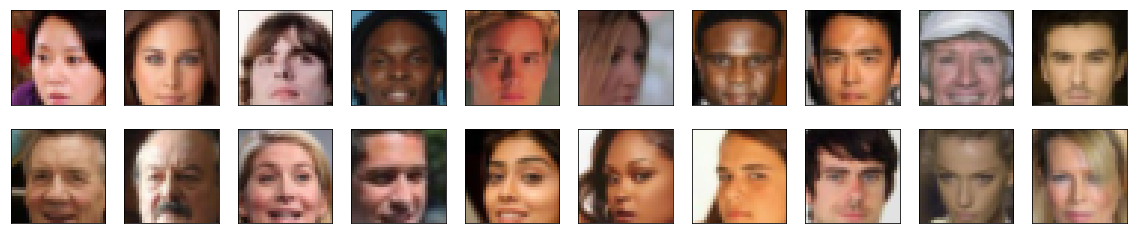

In [5]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [6]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min, max = feature_range
    x = x*(max-min) + min
    return x


In [7]:

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-1.)
Max:  tensor(0.9765)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
def conv(in_channels, out_channels, kernel_size, stride=2,padding=1, batch_norm=True):
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
    layers.append(conv_layer)
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)
        
def deconv(in_channels, out_channels, kernel_size, stride=2,padding=1, batch_norm=True):
    layers = []
    conv_layer = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
    layers.append(conv_layer)
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

In [13]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()
        self.conv_dim = conv_dim

        # complete init function
        # input: (32,32,3)
        self.conv1 = conv(3, conv_dim, 4, batch_norm=False) # (32, 16,16)
        self.conv2 = conv(conv_dim, conv_dim, 3, stride=1)  # (32, 16, 16)
        
        self.conv3 = conv(conv_dim, conv_dim*2, 4, stride=2) #(64, 8,8)
        self.conv4 = conv(conv_dim*2, conv_dim*2, 3, stride=1) #(64, 8,8)
        
        self.conv5 = conv(conv_dim*2, conv_dim*4, 4, stride=2) #(128, 4,4)
        self.conv6 = conv(conv_dim*4, conv_dim*4, 3, stride=1) #(128, 4,4)
        
        self.fc1 = nn.Linear(4*4*conv_dim*4, 1) #(2048,1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = x + self.conv2(x)
        
        x = F.leaky_relu(self.conv3(x), 0.2)
        x = x + self.conv4(x)
        
        x = F.leaky_relu(self.conv5(x), 0.2)
        self.dropout(x)
        x = F.leaky_relu(self.conv6(x), 0.2)
        
        x = x.view(-1, 4*4*self.conv_dim*4)
       
        x = self.fc1(x)
        return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)


Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [14]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        self.conv_dim = conv_dim
        
        # complete init function
        self.fc = nn.Linear(z_size,4*4*(conv_dim*4)) #reshape to (z_size, 256,4,4)
        self.deconv1 = deconv(conv_dim*4, conv_dim*2, 4) # (4*4*128)
        self.deconv2 = deconv(conv_dim*2, conv_dim, 4) # (8*8*)
        self.deconv3 = deconv(conv_dim, 3, 4)
        self.deconv4_res = deconv(3, 3, 1, stride=1, padding=0)
        self.deconv5_res = deconv(3,3,1, stride=1, padding=0)
        self.deconv6 = deconv(3, 3, 1, stride=1, padding=0, batch_norm=False)
        self.dropout = nn.Dropout(0.4)
    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        x = self.fc(x) # (conv_dim, 2048)
        x = x.view(-1,self.conv_dim*4,4,4) #(128, 4,4)
        
        x = self.deconv1(x) # (64, 8, 8)
        self.dropout(x)
        x = F.relu(x)
        
        x = self.deconv2(x)  # (32,16,16)
        x = F.relu(x)
        self.dropout(x)
        
        x = self.deconv3(x) #(3, 32,32)
        x = x+F.relu(x)
        self.dropout(x)
        
        x = self.deconv4_res(x) # (3,32,32)
        x = x+F.relu(x)
        self.dropout(x)
        
        x = x + self.deconv5_res(x) #(3,32,32)
        self.dropout(x)
        
        x = self.deconv6(x) #(3,32,32)
#         self.dropout(x)
        out = torch.tanh(x) 
        
        return out
    
    
"""

DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [15]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    # TODO: Apply initial weights to convolutional and linear layers
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=0.02)
        if m.bias is not None:
                m.bias.data.fill_(0)

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [17]:
# Define model hyperparams
d_conv_dim = 32
g_conv_dim = 32
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv6): Sequential(
    (0): Conv2d(128, 128, kernel_si

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [103]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [18]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    labels = torch.ones(D_out.size(0)) * 0.5
    criterion = nn.BCEWithLogitsLoss()
    if train_on_gpu:
        labels = labels.cuda()
    loss = criterion(D_out.squeeze(), labels)
    
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    labels = torch.zeros(D_out.size(0))
    criterion = nn.BCEWithLogitsLoss()
    if train_on_gpu:
        labels = labels.cuda()
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [19]:
import torch.optim as optim

lr= 0.0002 
beta1 = 0.9
beta2 = 0.9999

# Create optimizers for the discriminator D and generator G
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

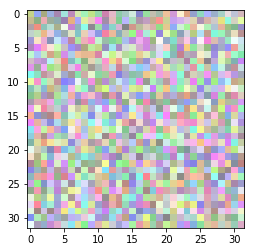

In [111]:

def show_image(image):
    img = image.squeeze(0).detach().cpu().numpy()
    img = img[0, :,:,:].transpose(1,2,0)
    img_scaled = ((img + 1)*255 / (2)).astype(np.uint8)
    plt.imshow(img_scaled)
    plt.show()
    

tor = torch.rand([16, 3, 32, 32])
show_image(tor)    

In [112]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            ############# 1. Train the discriminator on real and fake images #############
            d_optimizer.zero_grad()
            
            # Train on discriminator on real and fake images
            if train_on_gpu:
                real_images = real_images.cuda()
            
            d_real = D(real_images)
            d_real_loss = real_loss(d_real)
            
            #generate the fake image
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)

            # calculate loss of fake image in discriminator
            d_fake = D(fake_images)
            d_fake_loss = fake_loss(d_fake)
            
            #add their losses
            d_loss = d_real_loss +  d_fake_loss
            d_loss.backward()
            d_optimizer.step()
            
            ############## 2. Train the generator with an adversarial loss##############
            g_optimizer.zero_grad()
            
            #generate the fake image
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
            
            # calculate loss of fake image in discriminator for generator
            d_fake = D(fake_images)

            g_loss = real_loss(d_fake)


            g_loss.backward()
            g_optimizer.step()
    
    
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        show_image(samples_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    #save our model
    torch.save(G.state_dict(), 'G.pth')
    torch.save(D.state_dict(), 'D.pth')
    
    # finally return losses
    return losses



Set your number of training epochs and train your GAN!

Epoch [    1/   16] | d_loss: 0.7165 | g_loss: 2.8210
Epoch [    1/   16] | d_loss: 0.7894 | g_loss: 1.6803
Epoch [    1/   16] | d_loss: 0.7270 | g_loss: 2.8915
Epoch [    1/   16] | d_loss: 0.8635 | g_loss: 1.7895
Epoch [    1/   16] | d_loss: 0.7282 | g_loss: 1.9184
Epoch [    1/   16] | d_loss: 0.7546 | g_loss: 2.3555
Epoch [    1/   16] | d_loss: 0.7274 | g_loss: 3.2086
Epoch [    1/   16] | d_loss: 0.7201 | g_loss: 2.4662
Epoch [    1/   16] | d_loss: 0.7773 | g_loss: 1.6580
Epoch [    1/   16] | d_loss: 0.7230 | g_loss: 2.7932
Epoch [    1/   16] | d_loss: 0.7713 | g_loss: 1.1351
Epoch [    1/   16] | d_loss: 0.7371 | g_loss: 2.3720
Epoch [    1/   16] | d_loss: 0.8240 | g_loss: 2.8059
Epoch [    1/   16] | d_loss: 0.7992 | g_loss: 2.6110
Epoch [    1/   16] | d_loss: 0.7240 | g_loss: 2.6622
Epoch [    1/   16] | d_loss: 0.7792 | g_loss: 2.1277
Epoch [    1/   16] | d_loss: 0.8017 | g_loss: 1.7540
Epoch [    1/   16] | d_loss: 0.8940 | g_loss: 2.0362
Epoch [    1/   16] | d_loss

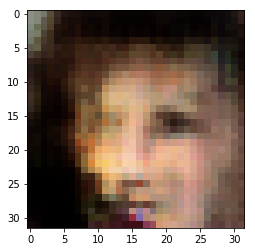

Epoch [    2/   16] | d_loss: 0.7406 | g_loss: 1.1569
Epoch [    2/   16] | d_loss: 0.8859 | g_loss: 1.4766
Epoch [    2/   16] | d_loss: 0.7470 | g_loss: 1.7920
Epoch [    2/   16] | d_loss: 0.7469 | g_loss: 3.0871
Epoch [    2/   16] | d_loss: 0.8528 | g_loss: 2.0562
Epoch [    2/   16] | d_loss: 0.7694 | g_loss: 3.3374
Epoch [    2/   16] | d_loss: 0.7220 | g_loss: 3.7737
Epoch [    2/   16] | d_loss: 0.7602 | g_loss: 2.4164
Epoch [    2/   16] | d_loss: 0.7213 | g_loss: 2.3565
Epoch [    2/   16] | d_loss: 0.7448 | g_loss: 2.0818
Epoch [    2/   16] | d_loss: 0.7250 | g_loss: 3.5020
Epoch [    2/   16] | d_loss: 0.7546 | g_loss: 2.2505
Epoch [    2/   16] | d_loss: 0.7872 | g_loss: 2.5242
Epoch [    2/   16] | d_loss: 0.7416 | g_loss: 2.1581
Epoch [    2/   16] | d_loss: 0.8045 | g_loss: 2.8017
Epoch [    2/   16] | d_loss: 0.8117 | g_loss: 2.2753
Epoch [    2/   16] | d_loss: 0.7921 | g_loss: 2.4737
Epoch [    2/   16] | d_loss: 0.7585 | g_loss: 3.2554
Epoch [    2/   16] | d_loss

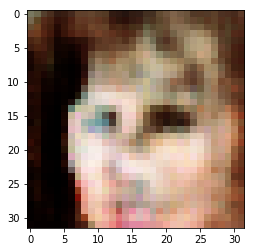

Epoch [    3/   16] | d_loss: 0.7819 | g_loss: 2.6370
Epoch [    3/   16] | d_loss: 0.8035 | g_loss: 1.3640
Epoch [    3/   16] | d_loss: 0.8790 | g_loss: 1.5824
Epoch [    3/   16] | d_loss: 0.7070 | g_loss: 2.7081
Epoch [    3/   16] | d_loss: 0.7228 | g_loss: 2.9213
Epoch [    3/   16] | d_loss: 0.7151 | g_loss: 4.6273
Epoch [    3/   16] | d_loss: 0.7858 | g_loss: 1.0819
Epoch [    3/   16] | d_loss: 0.8096 | g_loss: 1.8228
Epoch [    3/   16] | d_loss: 0.7213 | g_loss: 2.3605
Epoch [    3/   16] | d_loss: 0.7115 | g_loss: 2.2712
Epoch [    3/   16] | d_loss: 0.7512 | g_loss: 3.2926
Epoch [    3/   16] | d_loss: 0.7330 | g_loss: 2.8169
Epoch [    3/   16] | d_loss: 0.7361 | g_loss: 3.4035
Epoch [    3/   16] | d_loss: 0.7829 | g_loss: 1.8740
Epoch [    3/   16] | d_loss: 0.7177 | g_loss: 2.1432
Epoch [    3/   16] | d_loss: 0.8719 | g_loss: 1.4508
Epoch [    3/   16] | d_loss: 0.8785 | g_loss: 1.8222
Epoch [    3/   16] | d_loss: 0.8120 | g_loss: 3.5294
Epoch [    3/   16] | d_loss

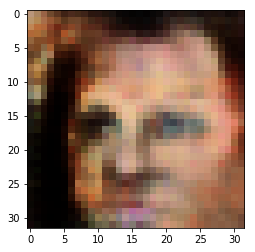

Epoch [    4/   16] | d_loss: 0.7396 | g_loss: 3.0732
Epoch [    4/   16] | d_loss: 0.7601 | g_loss: 2.8117
Epoch [    4/   16] | d_loss: 0.7434 | g_loss: 1.6126
Epoch [    4/   16] | d_loss: 0.8279 | g_loss: 2.3265
Epoch [    4/   16] | d_loss: 0.7335 | g_loss: 3.7058
Epoch [    4/   16] | d_loss: 0.8132 | g_loss: 1.9142
Epoch [    4/   16] | d_loss: 0.7306 | g_loss: 3.4111
Epoch [    4/   16] | d_loss: 0.8172 | g_loss: 1.3780
Epoch [    4/   16] | d_loss: 0.7419 | g_loss: 2.7323
Epoch [    4/   16] | d_loss: 0.7805 | g_loss: 2.8571
Epoch [    4/   16] | d_loss: 0.7718 | g_loss: 3.9625
Epoch [    4/   16] | d_loss: 0.7320 | g_loss: 2.6790
Epoch [    4/   16] | d_loss: 0.7569 | g_loss: 2.4231
Epoch [    4/   16] | d_loss: 0.8188 | g_loss: 3.7909
Epoch [    4/   16] | d_loss: 0.8254 | g_loss: 2.8625
Epoch [    4/   16] | d_loss: 0.7377 | g_loss: 1.6986
Epoch [    4/   16] | d_loss: 0.7301 | g_loss: 4.3772
Epoch [    4/   16] | d_loss: 0.7310 | g_loss: 1.9440
Epoch [    4/   16] | d_loss

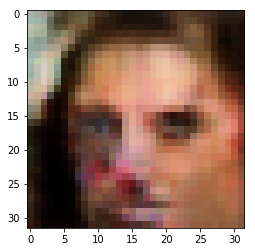

Epoch [    5/   16] | d_loss: 0.7411 | g_loss: 2.6769
Epoch [    5/   16] | d_loss: 0.7717 | g_loss: 2.1003
Epoch [    5/   16] | d_loss: 0.7544 | g_loss: 1.7120
Epoch [    5/   16] | d_loss: 0.7331 | g_loss: 2.6060
Epoch [    5/   16] | d_loss: 0.7326 | g_loss: 2.1762
Epoch [    5/   16] | d_loss: 0.7865 | g_loss: 1.5920
Epoch [    5/   16] | d_loss: 0.7877 | g_loss: 1.5480
Epoch [    5/   16] | d_loss: 0.8479 | g_loss: 2.5492
Epoch [    5/   16] | d_loss: 0.7726 | g_loss: 4.0668
Epoch [    5/   16] | d_loss: 0.7336 | g_loss: 1.0458
Epoch [    5/   16] | d_loss: 0.7444 | g_loss: 1.9070
Epoch [    5/   16] | d_loss: 0.7705 | g_loss: 2.6461
Epoch [    5/   16] | d_loss: 0.8245 | g_loss: 1.9621
Epoch [    5/   16] | d_loss: 0.7168 | g_loss: 2.0392
Epoch [    5/   16] | d_loss: 0.7811 | g_loss: 1.5356
Epoch [    5/   16] | d_loss: 0.7040 | g_loss: 4.9743
Epoch [    5/   16] | d_loss: 0.7232 | g_loss: 1.5999
Epoch [    5/   16] | d_loss: 0.7280 | g_loss: 3.1475
Epoch [    5/   16] | d_loss

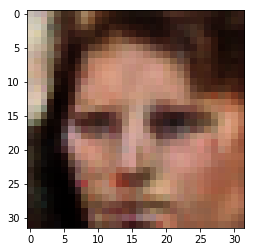

Epoch [    6/   16] | d_loss: 0.7552 | g_loss: 2.3052
Epoch [    6/   16] | d_loss: 0.7913 | g_loss: 3.3457
Epoch [    6/   16] | d_loss: 0.7401 | g_loss: 3.6579
Epoch [    6/   16] | d_loss: 0.7883 | g_loss: 2.3909
Epoch [    6/   16] | d_loss: 0.7596 | g_loss: 2.4269
Epoch [    6/   16] | d_loss: 0.7246 | g_loss: 1.9906
Epoch [    6/   16] | d_loss: 0.7783 | g_loss: 2.4743
Epoch [    6/   16] | d_loss: 0.9783 | g_loss: 1.9969
Epoch [    6/   16] | d_loss: 0.7232 | g_loss: 1.1375
Epoch [    6/   16] | d_loss: 0.7650 | g_loss: 1.7208
Epoch [    6/   16] | d_loss: 1.0314 | g_loss: 1.5741
Epoch [    6/   16] | d_loss: 0.7716 | g_loss: 2.0036
Epoch [    6/   16] | d_loss: 0.7161 | g_loss: 2.1787
Epoch [    6/   16] | d_loss: 0.8153 | g_loss: 1.1677
Epoch [    6/   16] | d_loss: 1.0016 | g_loss: 2.3799
Epoch [    6/   16] | d_loss: 0.7319 | g_loss: 2.0258
Epoch [    6/   16] | d_loss: 0.7437 | g_loss: 2.4567
Epoch [    6/   16] | d_loss: 0.7152 | g_loss: 2.1017
Epoch [    6/   16] | d_loss

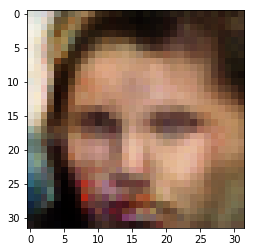

Epoch [    7/   16] | d_loss: 0.7698 | g_loss: 1.9328
Epoch [    7/   16] | d_loss: 0.7403 | g_loss: 1.6589
Epoch [    7/   16] | d_loss: 0.7622 | g_loss: 2.1689
Epoch [    7/   16] | d_loss: 0.7558 | g_loss: 3.5817
Epoch [    7/   16] | d_loss: 0.9136 | g_loss: 1.2203
Epoch [    7/   16] | d_loss: 0.8405 | g_loss: 1.4227
Epoch [    7/   16] | d_loss: 0.7236 | g_loss: 1.4636
Epoch [    7/   16] | d_loss: 1.5809 | g_loss: 3.1090
Epoch [    7/   16] | d_loss: 0.8834 | g_loss: 2.3043
Epoch [    7/   16] | d_loss: 0.7300 | g_loss: 2.4030
Epoch [    7/   16] | d_loss: 0.7250 | g_loss: 2.2986
Epoch [    7/   16] | d_loss: 0.7779 | g_loss: 1.8377
Epoch [    7/   16] | d_loss: 0.7938 | g_loss: 0.9687
Epoch [    7/   16] | d_loss: 0.8965 | g_loss: 2.8861
Epoch [    7/   16] | d_loss: 0.7737 | g_loss: 2.9810
Epoch [    7/   16] | d_loss: 0.7202 | g_loss: 1.6960
Epoch [    7/   16] | d_loss: 0.7113 | g_loss: 2.6583
Epoch [    7/   16] | d_loss: 0.7125 | g_loss: 3.0591
Epoch [    7/   16] | d_loss

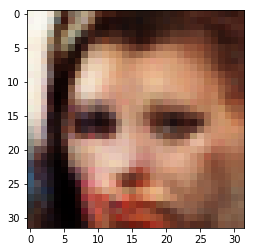

Epoch [    8/   16] | d_loss: 0.7530 | g_loss: 1.8072
Epoch [    8/   16] | d_loss: 0.8384 | g_loss: 1.5828
Epoch [    8/   16] | d_loss: 0.7128 | g_loss: 1.7888
Epoch [    8/   16] | d_loss: 1.0443 | g_loss: 3.1137
Epoch [    8/   16] | d_loss: 0.8227 | g_loss: 3.3625
Epoch [    8/   16] | d_loss: 0.7561 | g_loss: 2.0230
Epoch [    8/   16] | d_loss: 0.7586 | g_loss: 2.8050
Epoch [    8/   16] | d_loss: 0.7070 | g_loss: 3.2842
Epoch [    8/   16] | d_loss: 0.8344 | g_loss: 1.3266
Epoch [    8/   16] | d_loss: 0.7576 | g_loss: 1.6208
Epoch [    8/   16] | d_loss: 0.7124 | g_loss: 1.1366
Epoch [    8/   16] | d_loss: 0.7074 | g_loss: 3.6962
Epoch [    8/   16] | d_loss: 0.7636 | g_loss: 1.8104
Epoch [    8/   16] | d_loss: 0.8161 | g_loss: 3.5706
Epoch [    8/   16] | d_loss: 0.7224 | g_loss: 2.8071
Epoch [    8/   16] | d_loss: 0.7293 | g_loss: 1.9348
Epoch [    8/   16] | d_loss: 0.9396 | g_loss: 2.0049
Epoch [    8/   16] | d_loss: 1.1070 | g_loss: 2.9993
Epoch [    8/   16] | d_loss

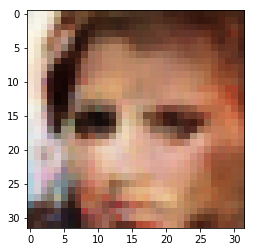

Epoch [    9/   16] | d_loss: 0.7327 | g_loss: 2.2118
Epoch [    9/   16] | d_loss: 0.7482 | g_loss: 0.9781
Epoch [    9/   16] | d_loss: 0.7469 | g_loss: 1.8604
Epoch [    9/   16] | d_loss: 0.8721 | g_loss: 4.1804
Epoch [    9/   16] | d_loss: 0.8258 | g_loss: 3.2468
Epoch [    9/   16] | d_loss: 0.8995 | g_loss: 2.2104
Epoch [    9/   16] | d_loss: 0.7564 | g_loss: 2.7711
Epoch [    9/   16] | d_loss: 1.2993 | g_loss: 2.8955
Epoch [    9/   16] | d_loss: 0.7974 | g_loss: 0.9591
Epoch [    9/   16] | d_loss: 0.7041 | g_loss: 2.7678
Epoch [    9/   16] | d_loss: 0.7612 | g_loss: 0.8567
Epoch [    9/   16] | d_loss: 0.7864 | g_loss: 0.9687
Epoch [    9/   16] | d_loss: 0.7241 | g_loss: 2.0198
Epoch [    9/   16] | d_loss: 0.7481 | g_loss: 2.8855
Epoch [    9/   16] | d_loss: 0.7199 | g_loss: 2.2066
Epoch [    9/   16] | d_loss: 0.7247 | g_loss: 2.2035
Epoch [    9/   16] | d_loss: 0.7948 | g_loss: 3.3608
Epoch [    9/   16] | d_loss: 0.8702 | g_loss: 1.1552
Epoch [    9/   16] | d_loss

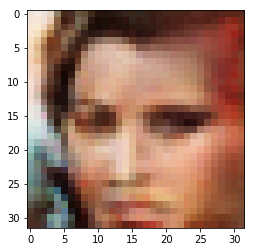

Epoch [   10/   16] | d_loss: 0.7689 | g_loss: 1.9639
Epoch [   10/   16] | d_loss: 0.7627 | g_loss: 1.4342
Epoch [   10/   16] | d_loss: 0.9321 | g_loss: 0.8715
Epoch [   10/   16] | d_loss: 0.7681 | g_loss: 3.0647
Epoch [   10/   16] | d_loss: 0.7217 | g_loss: 1.1648
Epoch [   10/   16] | d_loss: 0.7983 | g_loss: 1.8820
Epoch [   10/   16] | d_loss: 1.1462 | g_loss: 1.8945
Epoch [   10/   16] | d_loss: 0.9233 | g_loss: 1.6118
Epoch [   10/   16] | d_loss: 0.7166 | g_loss: 1.9854
Epoch [   10/   16] | d_loss: 0.8263 | g_loss: 2.6651
Epoch [   10/   16] | d_loss: 0.7673 | g_loss: 2.2499
Epoch [   10/   16] | d_loss: 0.7055 | g_loss: 2.0481
Epoch [   10/   16] | d_loss: 0.7136 | g_loss: 2.3688
Epoch [   10/   16] | d_loss: 0.7055 | g_loss: 3.3534
Epoch [   10/   16] | d_loss: 0.7646 | g_loss: 2.4090
Epoch [   10/   16] | d_loss: 0.7146 | g_loss: 2.2068
Epoch [   10/   16] | d_loss: 0.7459 | g_loss: 1.9008
Epoch [   10/   16] | d_loss: 0.8355 | g_loss: 1.9237
Epoch [   10/   16] | d_loss

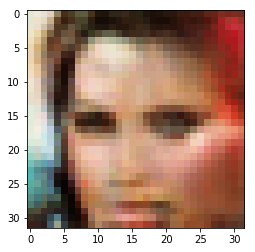

Epoch [   11/   16] | d_loss: 0.8697 | g_loss: 2.1000
Epoch [   11/   16] | d_loss: 0.7494 | g_loss: 2.1158
Epoch [   11/   16] | d_loss: 0.7924 | g_loss: 1.9155
Epoch [   11/   16] | d_loss: 0.7069 | g_loss: 2.9151
Epoch [   11/   16] | d_loss: 0.7037 | g_loss: 1.9629
Epoch [   11/   16] | d_loss: 0.7674 | g_loss: 1.8063
Epoch [   11/   16] | d_loss: 0.8989 | g_loss: 2.1446
Epoch [   11/   16] | d_loss: 0.7220 | g_loss: 1.1537
Epoch [   11/   16] | d_loss: 0.9407 | g_loss: 1.9960
Epoch [   11/   16] | d_loss: 0.7400 | g_loss: 1.7943
Epoch [   11/   16] | d_loss: 0.8674 | g_loss: 1.5127
Epoch [   11/   16] | d_loss: 0.7744 | g_loss: 2.3957
Epoch [   11/   16] | d_loss: 0.8602 | g_loss: 2.3360
Epoch [   11/   16] | d_loss: 0.7426 | g_loss: 1.8273
Epoch [   11/   16] | d_loss: 0.9460 | g_loss: 1.6262
Epoch [   11/   16] | d_loss: 0.8431 | g_loss: 1.3822
Epoch [   11/   16] | d_loss: 0.7180 | g_loss: 2.1891
Epoch [   11/   16] | d_loss: 0.7261 | g_loss: 2.5920
Epoch [   11/   16] | d_loss

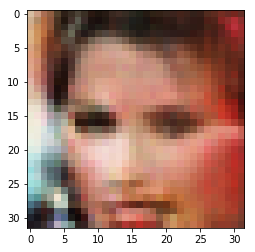

Epoch [   12/   16] | d_loss: 0.8391 | g_loss: 2.1681
Epoch [   12/   16] | d_loss: 0.8499 | g_loss: 2.8493
Epoch [   12/   16] | d_loss: 0.7423 | g_loss: 1.9818
Epoch [   12/   16] | d_loss: 0.7308 | g_loss: 1.0704
Epoch [   12/   16] | d_loss: 0.8400 | g_loss: 1.1710
Epoch [   12/   16] | d_loss: 0.9540 | g_loss: 2.9276
Epoch [   12/   16] | d_loss: 0.7745 | g_loss: 2.5455
Epoch [   12/   16] | d_loss: 0.7240 | g_loss: 1.6869
Epoch [   12/   16] | d_loss: 0.7076 | g_loss: 2.0429
Epoch [   12/   16] | d_loss: 0.7740 | g_loss: 4.4743
Epoch [   12/   16] | d_loss: 0.7359 | g_loss: 3.3367
Epoch [   12/   16] | d_loss: 0.9668 | g_loss: 0.8084
Epoch [   12/   16] | d_loss: 0.7238 | g_loss: 1.6152
Epoch [   12/   16] | d_loss: 0.7578 | g_loss: 1.1890
Epoch [   12/   16] | d_loss: 0.8872 | g_loss: 2.5471
Epoch [   12/   16] | d_loss: 0.7309 | g_loss: 2.2150
Epoch [   12/   16] | d_loss: 0.7166 | g_loss: 3.2044
Epoch [   12/   16] | d_loss: 0.7894 | g_loss: 3.5195
Epoch [   12/   16] | d_loss

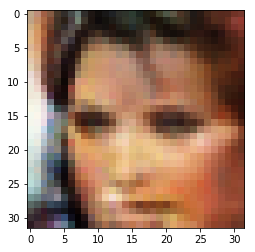

Epoch [   13/   16] | d_loss: 0.9596 | g_loss: 1.2461
Epoch [   13/   16] | d_loss: 0.7911 | g_loss: 3.6929
Epoch [   13/   16] | d_loss: 0.7519 | g_loss: 1.3565
Epoch [   13/   16] | d_loss: 0.8371 | g_loss: 0.9032
Epoch [   13/   16] | d_loss: 0.9335 | g_loss: 1.2185
Epoch [   13/   16] | d_loss: 0.7751 | g_loss: 2.3805
Epoch [   13/   16] | d_loss: 0.7862 | g_loss: 2.4406
Epoch [   13/   16] | d_loss: 1.1596 | g_loss: 1.8685
Epoch [   13/   16] | d_loss: 0.7867 | g_loss: 2.4758
Epoch [   13/   16] | d_loss: 0.7286 | g_loss: 2.7173
Epoch [   13/   16] | d_loss: 0.7566 | g_loss: 0.9615
Epoch [   13/   16] | d_loss: 0.8627 | g_loss: 1.4987
Epoch [   13/   16] | d_loss: 0.7177 | g_loss: 2.1168
Epoch [   13/   16] | d_loss: 0.7559 | g_loss: 2.3800
Epoch [   13/   16] | d_loss: 0.8254 | g_loss: 2.2545
Epoch [   13/   16] | d_loss: 0.7613 | g_loss: 2.8137
Epoch [   13/   16] | d_loss: 0.7446 | g_loss: 2.9370
Epoch [   13/   16] | d_loss: 0.7033 | g_loss: 2.2397
Epoch [   13/   16] | d_loss

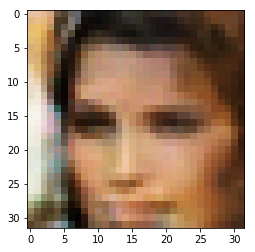

Epoch [   14/   16] | d_loss: 0.7635 | g_loss: 1.5078
Epoch [   14/   16] | d_loss: 0.9552 | g_loss: 1.8860
Epoch [   14/   16] | d_loss: 0.7437 | g_loss: 2.6223
Epoch [   14/   16] | d_loss: 1.0072 | g_loss: 1.9487
Epoch [   14/   16] | d_loss: 0.7355 | g_loss: 1.4896
Epoch [   14/   16] | d_loss: 0.7662 | g_loss: 2.4219
Epoch [   14/   16] | d_loss: 0.8922 | g_loss: 2.0136
Epoch [   14/   16] | d_loss: 1.3146 | g_loss: 1.2117
Epoch [   14/   16] | d_loss: 0.8365 | g_loss: 1.7232
Epoch [   14/   16] | d_loss: 1.3555 | g_loss: 0.8754
Epoch [   14/   16] | d_loss: 0.7637 | g_loss: 1.7546
Epoch [   14/   16] | d_loss: 0.7334 | g_loss: 1.7987
Epoch [   14/   16] | d_loss: 0.7223 | g_loss: 1.8794
Epoch [   14/   16] | d_loss: 0.7900 | g_loss: 1.7598
Epoch [   14/   16] | d_loss: 1.1206 | g_loss: 1.2857
Epoch [   14/   16] | d_loss: 0.7452 | g_loss: 2.2623
Epoch [   14/   16] | d_loss: 1.0912 | g_loss: 2.3128
Epoch [   14/   16] | d_loss: 0.7228 | g_loss: 3.5449
Epoch [   14/   16] | d_loss

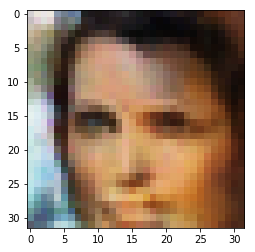

Epoch [   15/   16] | d_loss: 0.7722 | g_loss: 3.1115
Epoch [   15/   16] | d_loss: 0.7106 | g_loss: 3.3195
Epoch [   15/   16] | d_loss: 0.7216 | g_loss: 2.8645
Epoch [   15/   16] | d_loss: 0.7111 | g_loss: 2.7393
Epoch [   15/   16] | d_loss: 0.7746 | g_loss: 2.2600
Epoch [   15/   16] | d_loss: 0.7255 | g_loss: 2.2418
Epoch [   15/   16] | d_loss: 0.7618 | g_loss: 2.6361
Epoch [   15/   16] | d_loss: 0.8012 | g_loss: 2.6568
Epoch [   15/   16] | d_loss: 0.7951 | g_loss: 2.7952
Epoch [   15/   16] | d_loss: 0.8662 | g_loss: 2.5963
Epoch [   15/   16] | d_loss: 0.7174 | g_loss: 2.7404
Epoch [   15/   16] | d_loss: 0.7663 | g_loss: 1.8142
Epoch [   15/   16] | d_loss: 0.7244 | g_loss: 3.1185
Epoch [   15/   16] | d_loss: 0.7290 | g_loss: 2.6699
Epoch [   15/   16] | d_loss: 0.7142 | g_loss: 2.5966
Epoch [   15/   16] | d_loss: 0.7020 | g_loss: 2.3990
Epoch [   15/   16] | d_loss: 0.9887 | g_loss: 2.5579
Epoch [   15/   16] | d_loss: 0.7017 | g_loss: 2.1235
Epoch [   15/   16] | d_loss

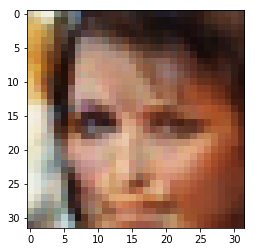

Epoch [   16/   16] | d_loss: 0.7356 | g_loss: 2.2184
Epoch [   16/   16] | d_loss: 0.7437 | g_loss: 1.8932
Epoch [   16/   16] | d_loss: 0.7097 | g_loss: 1.9198
Epoch [   16/   16] | d_loss: 0.7275 | g_loss: 2.4210
Epoch [   16/   16] | d_loss: 0.7058 | g_loss: 1.5223
Epoch [   16/   16] | d_loss: 0.7023 | g_loss: 1.8923
Epoch [   16/   16] | d_loss: 0.7284 | g_loss: 2.3273
Epoch [   16/   16] | d_loss: 0.7498 | g_loss: 2.3010
Epoch [   16/   16] | d_loss: 0.8381 | g_loss: 2.9722
Epoch [   16/   16] | d_loss: 0.7300 | g_loss: 1.1306
Epoch [   16/   16] | d_loss: 0.7661 | g_loss: 4.0010
Epoch [   16/   16] | d_loss: 0.8854 | g_loss: 3.9377
Epoch [   16/   16] | d_loss: 0.7307 | g_loss: 3.2332
Epoch [   16/   16] | d_loss: 0.7981 | g_loss: 2.8694
Epoch [   16/   16] | d_loss: 0.7106 | g_loss: 3.1970
Epoch [   16/   16] | d_loss: 0.7186 | g_loss: 4.1359
Epoch [   16/   16] | d_loss: 0.7074 | g_loss: 2.6357
Epoch [   16/   16] | d_loss: 0.7250 | g_loss: 3.6641
Epoch [   16/   16] | d_loss

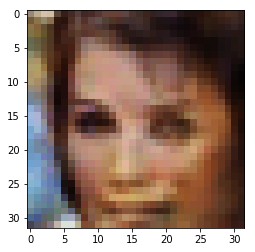

In [114]:
from workspace import keep_awake
from workspace import active_session
# set number of epochs 

n_epochs = 16


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
for i in keep_awake(range(1)):
    with active_session():
        losses = train(D, G, n_epochs=n_epochs)

In [22]:
check_gpu = torch.cuda.is_available()
weight_path ='weights/G.pth'

G.load_state_dict(torch.load(weight_path,map_location=torch.device('cpu')))
if check_gpu is True:
    G.load_state_dict(torch.load(weight_path),map_location=torch.device('cuda'))

def generate_images(no_of_images):
    for i in range(no_of_images):
        if check_gpu is True:
            img = G(torch.from_numpy(np.random.uniform(-1, 1, size=(1,100))).cuda().float()).squeeze_(0).permute(1,2,0).detach().cpu().numpy()
        else:
            img = G(torch.from_numpy(np.random.uniform(-1, 1, size=(1,100))).float()).squeeze_(0).permute(1,2,0).detach().cpu().numpy()
        img_scaled = ((img + 1)*255 / (2)).astype(np.uint8)
        mpimg.imsave('generated_samples/img_{}.jpg'.format(i), img_scaled)

In [23]:
generate_images(100)

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

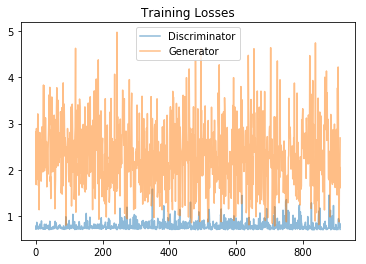

In [115]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [116]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [117]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

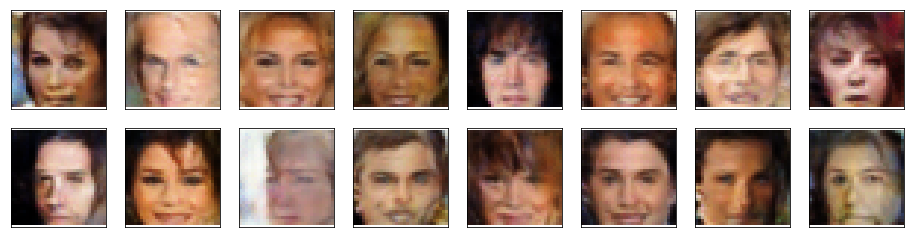

In [118]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:** I noticed stabilizing it is very hard. Even slight changes to original DCGAN structure results different outputs. Although,  I managed to get modified DCGAN with added resnet architecture with good differential results. I've got following idea to improve the model. Here are the ideas:

1) Looking at the original dataset, It is not diversered at all. People of different races, shapes are not included. This may heavily influence to generated data.Even they are not evenly distributed. Although for deeper networks noise don't effect but if noise is in greater quantity it does effect. Some noise like cropped jawline should be removed and dataset should be carefully collected.

2) We need to go deeper. As we know , The more we go deeper ,more we'll be able to get features. So, If we add more layers to it and tried to experiment with different hyperparameter, we would be able to must get good results, its obvious.I did tried to go some deeper, we can go more, but can take computing power and time.

3) On seeing the papers of cycleGAN for higher resolution images. They mentioned to use architecture of 'conv-batchnorm-relu-dropout', I tried to add this kind of architecture with dropout in generator network and it worked. As our lecture suggest labels_smoothing , worked rather than not smoothing. Before generator was to smart after some iteration it gone to zero , and label smoothing helped. Also as mentioned in DCGAN paper and cycleGAN paper i have lr= 0.0002,beta2 = 0.9999, Previously i had used beta1 = 0.5 which didnt shown good results for new architecture, I used 0.9 and worked really well. For getting the intuition on training i had used seen ganhacks by soumith , helped really. Like for up sampling I used convtranspose +stride and for downsampling conv+stride , added batch norm. For tracking failures early i used Failure mode idea.Again for second time using SGD on discriminator and Adam on generator, caused failure mode so i again used ADAM for both.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.